# Task 1. Data Clustering - Seed Shape Data

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Explore data set and decide upon two variables.

In [32]:
seeds = pd.read_csv('seeds.csv') # load seed data set
seeds.head() # display first five rows

,area,perimeter,compactness,length,width,asymmetry,groove length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


In [33]:
seedsLW = seeds[['length','width']].copy() # create new data set from seeds length and width
seedsLW.head() # display first five rows

,length,width
0,5.763,3.312
1,5.554,3.333
2,5.291,3.337
3,5.324,3.379
4,5.658,3.562


Text(0.5, 1.0, 'Seed Length vs. Width')

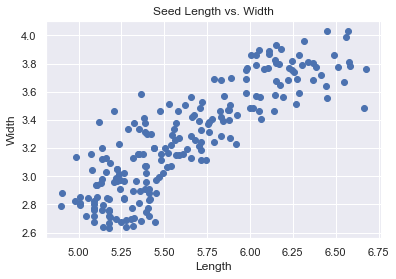

In [34]:
plt.scatter(seedsLW['length'],seedsLW['width']) # plot scatter of length vs width
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Seed Length vs. Width')

Seed length vs width seem to be the logical variables to explore as they pertain to the size of the seed, consequently the seeds can be clustered into groups based upon their size. It is not obvious how many clusters there will be so we must use another method to figure out k.

## 2. Find k value from Elbow method.

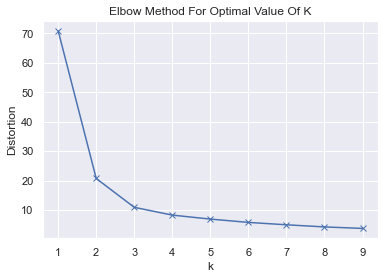

In [35]:
distortions = [] # runs KMeans for k values between 1 and 10, finds the inertia, best value for k is at 'elbow point'
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(seedsLW)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal Value Of K')
plt.show()

The inflection point is at a k value of 3, this will be used for the final KMeans clustering.

## 3. Apply k value to KMeans algorithm.

In [36]:
km = KMeans(n_clusters=3) # best k value is 3
y_predicted = km.fit_predict(seedsLW[['length','width']]) # fit and predict for length and width, assign cluster number
y_predicted # show cluster numbers 

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
seedsLW['cluster'] = y_predicted # add cluster number to data frame
seedsLW.head() # display first five rows

,length,width,cluster
0,5.763,3.312,2
1,5.554,3.333,2
2,5.291,3.337,2
3,5.324,3.379,2
4,5.658,3.562,2


## 4. Produce a scatter plot of clusters.

Text(0.5, 1.0, 'Clustering of Seed Length vs. Width')

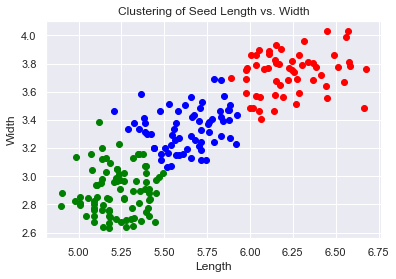

In [38]:
LW0 = seedsLW[seedsLW.cluster==0] # data frame of 0 cluster
LW1 = seedsLW[seedsLW.cluster==1] # data frame of 1 cluster
LW2 = seedsLW[seedsLW.cluster==2] # data frame of 2 cluster

plt.scatter(LW0.length,LW0.width,color='red') # plot 0 cluster as red
plt.scatter(LW1.length,LW1.width,color='green') # plot 1 cluster as green
plt.scatter(LW2.length,LW2.width,color='blue') # plot 2 cluster as blue

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Clustering of Seed Length vs. Width')

From the variables of length and width, three seed clusterings have been identified and plotted. The KMeans algorithm was used as it is simple to implement and can scale well to large data sets, such as the seed data set. From the initial scatter plot, it was shown that the seeds mostly follow a directly proportional trend, as such the clusters would each be a similar size to each other with few outliers. Furthermore, the seed length and width are of a similar scale so min-maxing is not required. While Gaussian clustering may lead to greater accuracy in clustering, the KMeans plot shows three distinct groupings without crossover, so the use of Gaussian is unnecessary. 

# Task 2. Social Network Analysis

In [39]:
import networkx as nx

## 1. Visualisation of Network.

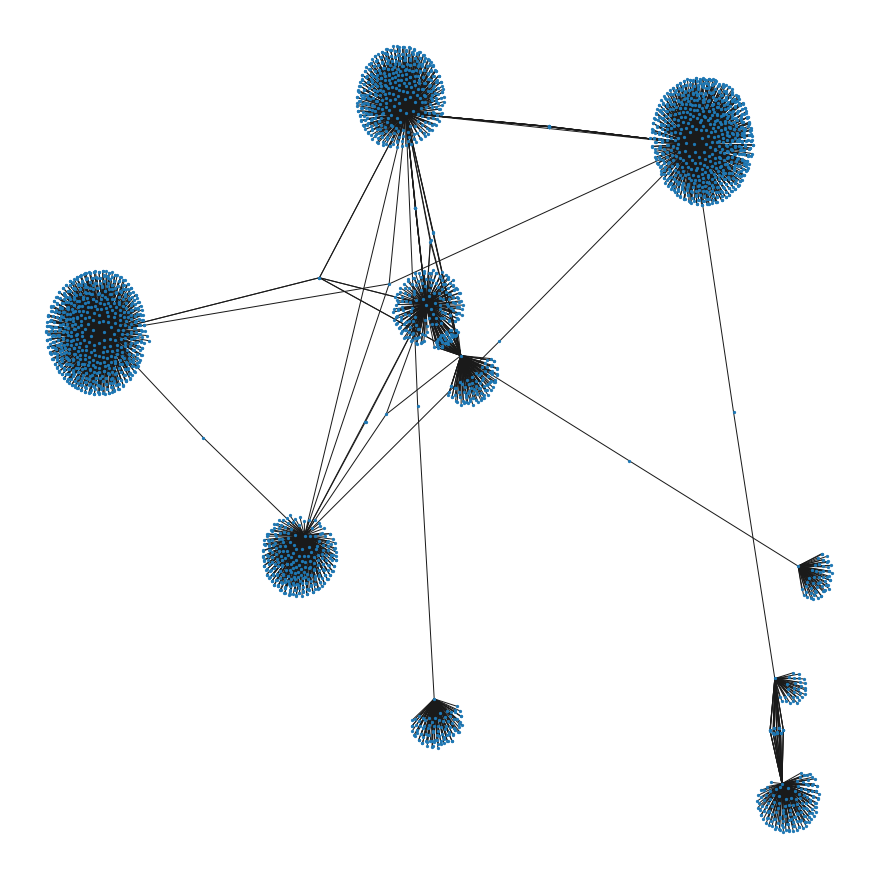

In [40]:
sn = pd.read_csv('social-network.csv')
G = nx.from_pandas_edgelist(sn, source='1',target='2')
layout = nx.spring_layout(G)
plt.figure(1,figsize=(12,12))
nx.draw(G,layout,node_size = 5)
plt.show()

The plot shows there are ten distinguishable clusters of users. Each cluster is connected to at least one other cluster, either to a node directly in the other cluster, or by an independent connecting node. Each cluster may represent a different location within the real world; this would explain why there are so many connections between nodes within the same cluster, but few between nodes of different clusters. The size of each cluster could indicate how many people use the social network within that location, the larger clusters seem to have more connections to other clusters, while the smaller clusters have fewer. 

## 2. Statistical Analysis

### Number of Nodes:

A node is a vertex/point within a network. 

In [41]:
snNodes = G.number_of_nodes()
print(snNodes)

2887


### Number of Edges:

An edge is the connection between two nodes within a network.

In [42]:
snEdges = G.number_of_edges()
print(snEdges)

2980


### Average Degree:

The average degree is the average number of connections a node has.

In [43]:
avgDeg = snEdges/snNodes
print(avgDeg)

1.032213370280568


All nodes are connected so the average degree is at least 1.

### Number of Connected Components:

A connected component is a set of nodes from which it is possible to reach all other nodes in the set.

In [44]:
numComp = nx.number_connected_components(G)
print(numComp)

1


It is possible to reach any node from any given starting node, so the number of components is 1.

### Diameter:

The largest possible number of edges that must be traversed to travel on the shortest path between two nodes in a network.

In [45]:
diam = nx.diameter(G)
print(diam)

9


Given its size, the network has a low diameter, suggesting that there are a number of main connecting nodes most paths can travel through.

### Degree Distribution

The frequency with which the number of edges a node has occurs.

Text(0, 0.5, 'Frequency')

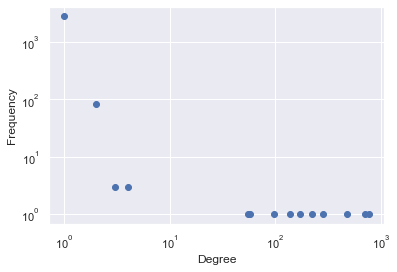

In [46]:
ddist = nx.degree_histogram(G)[1:] # Skip 0 degree nodes
plt.loglog(range(1,len(ddist)+1),ddist,'o')
plt.xlabel("Degree")
plt.ylabel("Frequency")

### Cluster Coefficient

The cluster coefficient is a measure of how interconnected the neighbours of each node are.

Text(0.5, 0, 'Clustering Coefficient')

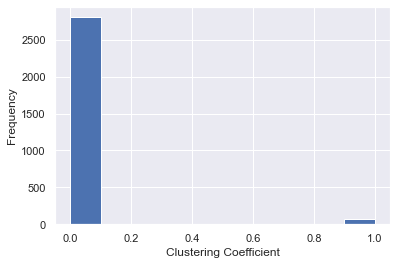

In [47]:
cc = nx.clustering(G)
plt.hist(list(cc.values()),bins=10)
plt.ylabel('Frequency')
plt.xlabel('Clustering Coefficient')

The majority of nodes have a clustering coefficient below 0.1. This means the neighbours of the average node are not densely clustered together.

### Betweenness Centrality 

The betweenness centrality is the measure of importance of a node within a network. A higher bc indicates a greater number of paths between nodes that go via that node.

In [48]:
nx.betweenness_centrality(G)

{1: 0.18553227937977304,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.02394563607735185,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.021741725727860768,
 70: 0.0,
 71: 0.00885680107517199,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0,
 83: 0.0,
 84: 0.0,
 85: 0.0,
 86: 0.0,
 87: 0.0,
 88: 0.0,
 89: 0.0,
 90: 0.0033071126052061587,
 91: 0.0,
 92: 0.0,
 93: 0.0,
 94: 

Most nodes have a bc value of 0.0, incdicating only a select number of nodes are important for routing.

### Assortativity

Assortativity is the preference for a network's nodes to attach to similar nodes.

In [49]:
nx.degree_assortativity_coefficient(G)

-0.6680321896944319

A negative assortativity indicates the nodes do not have strong interaction with one another.